**Problem 2**

In [ ]:
# Importing all of the libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Question 1

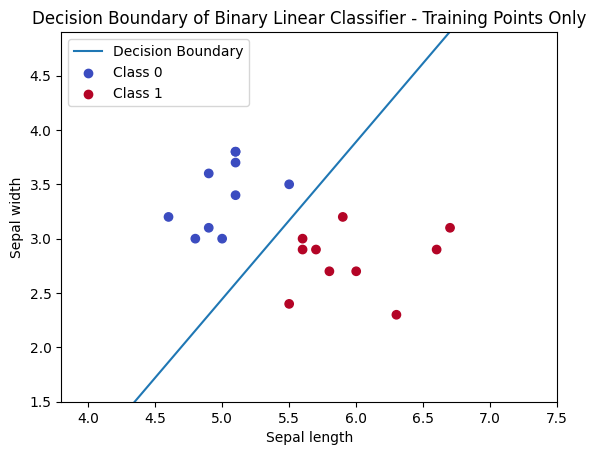

In [ ]:
# Loading dataset
dataset = load_iris()
data = dataset.data[:100, :2]
target = dataset.target[:100]

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.8, random_state=0)

# Initializing and training the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Determining coefficients and intercept
w = model.coef_[0]
b = model.intercept_[0]

# Generating x and y values for plotting the decision boundary
xx = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 1000)
yy = -w[0] * xx / w[1] - (b / w[1])

# Plot the contour and training examples
plt.figure()
plt.plot(xx, yy, label="Decision Boundary")
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary of Binary Linear Classifier - Training Points Only')
dummy1 = plt.scatter([], [], color = plt.cm.coolwarm(0), label = 'Class 0')
dummy2 = plt.scatter([], [], color = plt.cm.coolwarm(100000), label = 'Class 1')
plt.xlim([data[:, 0].min() - .5, data[:, 0].max() + .5])
plt.ylim([data[:, 1].min() - .5, data[:, 1].max() + .5])
plt.legend()
plt.show()


In [ ]:
model_bl = model
print(model_bl.coef_[0])

[ 1.80226162 -1.24492959]


Question 2

In [ ]:
# Predicting based on test and train sets
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

# Checking accuracy
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")

Training Accuracy: 100.00%
Test Accuracy: 98.75%


Question 3

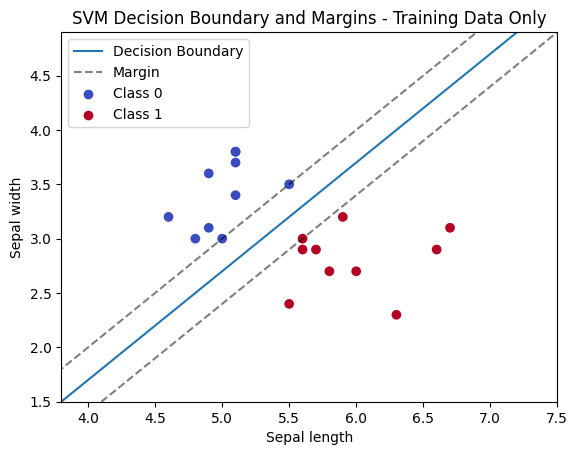

In [ ]:
# Create a linear SVM classifier with the linear kernel
model = SVC(kernel='linear', C=1E8)  # C is large so we can have a hard margin

# Train the classifier
model.fit(x_train, y_train)

# Determining coefficients and intercept
w= model.coef_[0]
b = model.intercept_[0]

# Determining x and y values for the decision boundary
xx = np.linspace(data[:, 0].min() - .5, data[:, 0].max() + .5, 1000)
yy= -w[0] * xx / w[1] - (b / w[1])

# Plot the data points
plt.plot(xx, yy, label = "Decision Boundary")
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)

# Visualizing the margin for the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
XX, YY = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.5,
           linestyles=['--', '--'])

# Labelling and displaying the plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary and Margins - Training Data Only')
plt.xlim([data[:, 0].min() - .5, data[:, 0].max() + .5])
plt.ylim([data[:, 1].min() - .5, data[:, 1].max() + .5])
dummy3 = plt.plot([], [], "--", color = "gray", label = 'Margin')
dummy1 = plt.scatter([], [], color = plt.cm.coolwarm(0), label = 'Class 0')
dummy2 = plt.scatter([], [], color = plt.cm.coolwarm(100000), label = 'Class 1')
plt.legend()
plt.show()

Question 4

By the duality theorem (in the context of SVMs), support vectors can be identified through the KKT conditions, namely the complementary slackness condition. This condition states that the Lagrange multiplier (α) multiplied by the constraint must be equal to zero. More specifically, this implies that if a data point has a non-zero Lagrange multiplier (α_i ≠ 0), it lies on the margin and is thus a support vector. On the other hand, if the data point is outside the margin (and is correctly classified), α_i will be zero.

In practical terms, after solving the dual form of the SVM optimization problem, support vectors are essentially the data points corresponding to any non-zero α_i, which are circled in the plot below for visual emphasis.

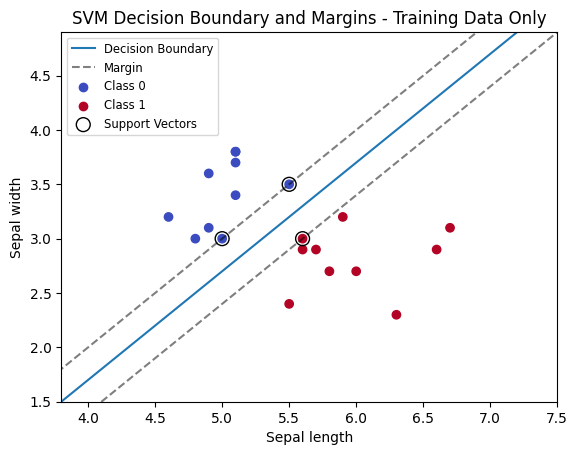

In [ ]:
# Create a linear SVM classifier with the linear kernel
model = SVC(kernel='linear', C=1E8)  # C is really big so we can have a hard margin

# Train the classifier
model.fit(x_train, y_train)

# Determining coefficients and intercept
w= model.coef_[0]
b = model.intercept_[0]

# Determining x and y values for the decision boundary
xx = np.linspace(data[:, 0].min() - .5, data[:, 0].max() + .5, 1000)
yy= -w[0] * xx / w[1] - (b / w[1])

# Plot the data points
plt.plot(xx, yy, label = "Decision Boundary")
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm) #CHANGED THIS

# Visualizing the margin for the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
XX, YY = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.5,
           linestyles=['--', '--'])
dummy3 = plt.plot([], [], "--", color = "gray", label = 'Margin')
dummy1 = plt.scatter([], [], color = plt.cm.coolwarm(0), label = 'Class 0')
dummy2 = plt.scatter([], [], color = plt.cm.coolwarm(100000), label = 'Class 1')

# Highlight the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

# Labelling and displaying the plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary and Margins - Training Data Only')
plt.xlim([data[:, 0].min() - .5, data[:, 0].max() + .5])
plt.ylim([data[:, 1].min() - .5, data[:, 1].max() + .5])
plt.legend(fontsize='small')
plt.show()

In [ ]:
model_svm = model

Question 5

In [ ]:
# Making predictions on testing and training data
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 100.00%
Test accuracy: 100.00%


Question 6

In [ ]:
w = model.coef_

# 1 divided by the norm of w gives the distance between the boundary and the margin
# This is multiplied by 2 because there are two sides of the margin
margin = 2 / np.linalg.norm(w)

print(f"The margin of the SVM classifier is: {margin:.4f}")

The margin of the SVM classifier is: 0.4243


Question 7

In [ ]:
print("weight vector: ", w[0])

weight vector:  [ 3.33266363 -3.33342658]


The weight vector (w) is the vector that is orthogonal to the decision boundary.

Question 8

By changing the train/test split, namely increasing the number of training datapoints and decreasing the number of testing datapoints, it resulted in there being different/new support vectors. Looking at the plot below, the old support vectors are circled in green and the new ones are circled in black. As you can see, some of the old support vectors lie outside of the new margin, which means they are no longer support vectors in this new train/test split. This indicates that the decision boundary changed and hence the margin became narrower.

Even with the changes, both Support Vector Machines (SVMs) from the 80% and 40% test sizes didn't change their accuracy and correctly classified all the points. This shows that SVMs can be really stable and work well even when the data or the decision boundary changes a bit.

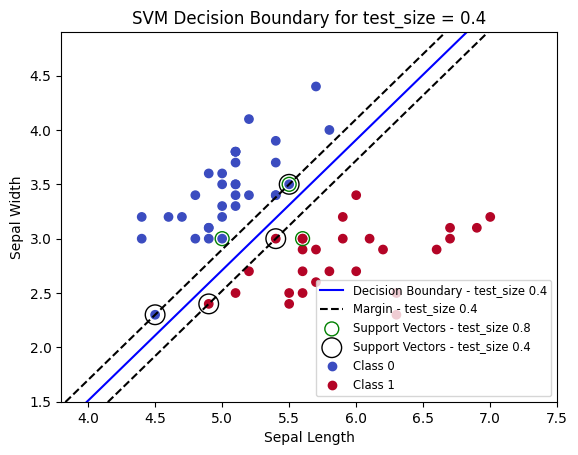

Training accuracy: 100.00%
Test accuracy: 100.00%


In [ ]:
# NOW DOING test_size=0.4
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)

# Train SVM
modelnew = SVC(kernel='linear', C=1E10)  # Large C for hard margin
modelnew .fit(X_train, y_train)

# Find the coefficients and intercept
w = modelnew .coef_[0]
b = modelnew .intercept_[0]

xx_new = np.linspace(data[:, 0].min() - 5, data[:, 0].max() + 5, 1000)  # Generate the x_values needed for the decision boundary
yy_new = -w[0] * xx_new / w[1] - (b / w[1])

# Plot decision boundaries
plt.plot(xx_new, yy_new, 'b-', label="Decision Boundary - test_size 0.4")
# plt.plot(xx, yy, 'g-', label="Decision Boundary - test_size 0.8")
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, marker = "o", cmap=plt.cm.coolwarm)

# Plot margin for the test_size 0.4 boundary
plt.plot(xx_new, yy_new - 1/modelnew .coef_[0][1], 'k--', label="Margin - test_size 0.4")
plt.plot(xx_new, yy_new + 1/modelnew .coef_[0][1], 'k--')

# Highlighting support vectors with a circle around them
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='g', marker='o', label="Support Vectors - test_size 0.8")
plt.scatter(modelnew.support_vectors_[:, 0], modelnew.support_vectors_[:, 1], s=200,
            linewidth=1, facecolors='none', edgecolors='k', marker='o', label="Support Vectors - test_size 0.4")

dummy1 = plt.scatter([], [], color = plt.cm.coolwarm(0), label = 'Class 0')
dummy2 = plt.scatter([], [], color = plt.cm.coolwarm(100000), label = 'Class 1')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.xlim([data[:, 0].min() - .5, data[:, 0].max() + .5])
plt.ylim([data[:, 1].min() - .5, data[:, 1].max() + .5])
plt.legend(fontsize='small')
plt.title("SVM Decision Boundary for test_size = 0.4")
plt.show()

# Determining accuracy
train_accuracy = modelnew.score(X_train, y_train)
test_accuracy = modelnew.score(X_test, y_test)
print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Question 9

No, they do not have the same decision boundaries, as can be seen by the differences in their equations.

In [ ]:
w_svm = model_svm.coef_[0]
b_svm = model_svm.intercept_[0]
print(f"SVM decision boundary equation: x2={-w_svm[0]/w_svm[1]:.4f}*x1{-b_svm/w_svm[1]:.4f}")

w = model_bl.coef_[0]
b = model_bl.intercept_[0]
print(f"Binary linear classifier decision boundary equation: x2={-w[0]/w[1]:.4f}*x1{-b/w[1]:.4f}")


SVM decision boundary equation: x2=0.9998*x1-2.2988
Binary linear classifier decision boundary equation: x2=1.4477*x1-4.7943


Question 10

Utilizing an SVM with a radial basis function (RBF) kernel addresses the issue of non-linearly separable data in the iris dataset. The RBF kernel uses a Gaussian function to transform the data into a higher-dimensional space, which allows for the model to create non-linear decision boundaries. As demonstrated in the accompanying plot, the SVM with RBF kernel is able to effectively separate the majority of the datapoints across the three classes.

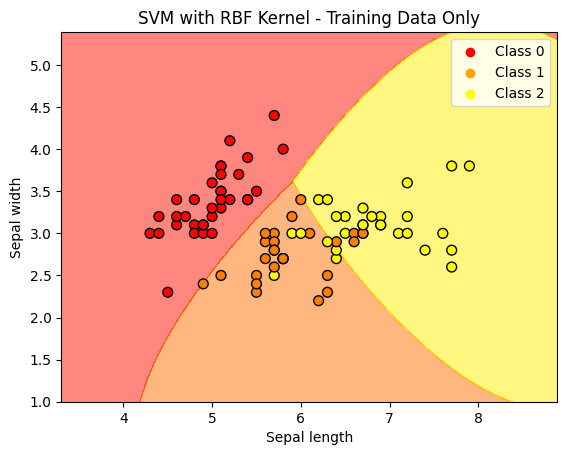

In [ ]:
# Load iris data
iris = datasets.load_iris()
X = iris.data[:, :2]  # considering only the first two features
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Train SVM with RBF kernel
model = SVC(kernel='rbf', gamma='scale', C=1)
model.fit(X_train, y_train)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='autumn')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.autumn)
dummy1 = plt.scatter([], [], color = "red", label = 'Class 0')
dummy2 = plt.scatter([], [], color = "orange", label = 'Class 1')
dummy3 = plt.scatter([], [], color = "yellow", label = 'Class 2')
plt.title('SVM with RBF Kernel - Training Data Only')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()
